In [1]:
%load_ext autoreload
%pylab inline
%autoreload 2
    
import sys
sys.path.append('../')
import LLMP as L

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Bars

Left bar: 40-50 pixels
Right bar: 60-70 pixels GT: [51, 57]


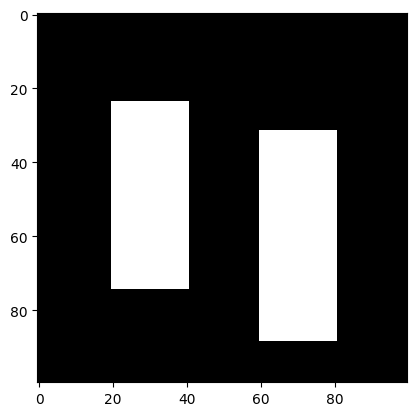

In [2]:
image, label = L.GPImage.figure12(False)
imshow(image, cmap='gray')

question = 'What do you see? There are two black bars. The image is 100 by 100 pixels. Estimate the length of the left bar in pixel (the value should be between 0 and 100). It does not have to be a precise calculation; I just need an estimation. JUST give me the range. After that, give me the lenght range fot the right bar as well.'
answer = L.ChatGPT.query(question, image)
print(answer, 'GT:', label)

In [4]:
import re
left_match = re.search(r'Left bar: (\d+)-(\d+) pixels', answer)
right_match = re.search(r'Right bar: (\d+)-(\d+) pixels', answer)

left_range = [int(left_match.group(1)), int(left_match.group(2))] if left_match else None
right_range = [int(right_match.group(1)), int(right_match.group(2))] if right_match else None

[40, 50]

In [5]:
print(left_range)
print(right_range)

[40, 50]
[60, 70]


In [7]:
left_error = []
for r in left_range:
    left_error.append(r - label[0])
left_error

[-11, -1]

In [8]:
right_error = []
for r in right_range:
    right_error.append(r - label[1])
right_error

[3, 13]

Framed Bars

The left bar is approximately between 40 and 50 pixels in length. The right bar is also approximately between 40 and 50 pixels in length. GT: [53, 50]


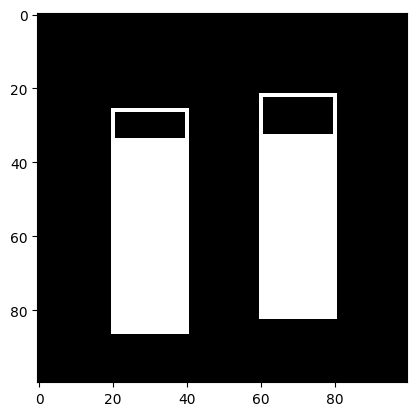

In [9]:
image, label = L.GPImage.figure12(True)
imshow(image, cmap='gray')

question = 'What do you see? There are two black bars with a black frame. The image is 100 by 100 pixels. Estimate the length of the left bar in pixel (just look at the bar inside) .The value should be between 0 and 100. It does not have to be a precise calculation; I just need an estimation. JUST give me the range. After that, give me the lenght range fot the right bar as well.'
answer = L.ChatGPT.query(question, image)
print(answer, 'GT:', label)